# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Q1.1
df = pd.read_csv('data/airbnb_NYC.csv', encoding='latin1')
df['Price'] = df['Price'].astype(str).str.replace(',', '')
df['Price'] = pd.to_numeric(df['Price'])

In [3]:
# Q1.2 
dfP = pd.read_csv('data/mn_police_use_of_force.csv', encoding='latin1')
dfP['subject_injury'].unique()
dfP["subject_injury"] = dfP["subject_injury"].replace({np.nan: 'Missing'})
dfP['subject_injury'].unique()

array(['Missing', 'No', 'Yes'], dtype=object)

In [4]:
# Q1.3
dfPMet = pd.read_csv('data/metabric.csv', encoding='latin1')
dfPMet['Overall Survival Status'] = dfPMet['Overall Survival Status'].replace({"0:LIVING": 1, "1:DECEASED": 0})
dfPMet['Overall Survival Status'].unique()

/tmp/ipykernel_1796/3456484297.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfPMet['Overall Survival Status'] = dfPMet['Overall Survival Status'].replace({"0:LIVING": 1, "1:DECEASED": 0})


array([1, 0])

In [9]:
# Q1.4
dfAir = pd.read_csv('data/airbnb_NYC.csv', encoding='latin1')
dfAir["Review Scores Rating"].unique()
AirMedian = dfAir["Review Scores Rating"].median()
dfAir["Review Scores Rating"] = dfAir["Review Scores Rating"].replace({np.nan: AirMedian})
dfAir["Review Scores Rating"].unique()

# This would impact results by changing the distribution of the "Review Scores Rating" variable, potentially affecting analyses that rely on this data, such as calculating averages or identifying trends.
# This procedure assumes that the missing values are similar to the median of the observed values, which may not always be the case.

array([ 94.,  96., 100.,  90.,  98.,  93.,  91.,  97.,  95.,  99.,  85.,
        86.,  80.,  88.,  92.,  89.,  82.,  87.,  81.,  76.,  78.,  83.,
        66.,  84.,  72.,  79.,  60.,  40.,  62.,  74.,  77.,  50.,  71.,
        75.,  73.,  69.,  65.,  68.,  70.,  67.,  64.,  20.,  57.,  58.,
        43.,  63.,  55.,  47.,  53.,  49.,  30.])

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

<Axes: xlabel='Year', ylabel='Count'>

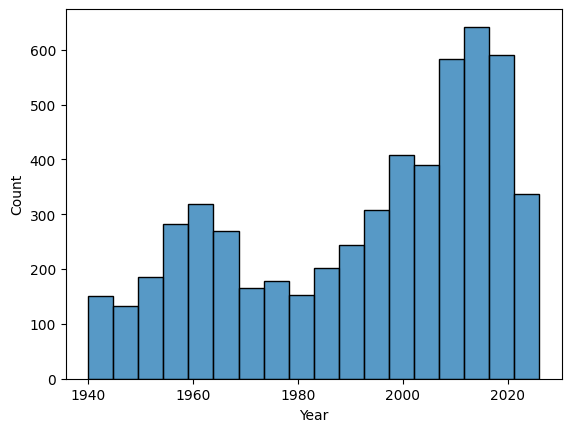

In [43]:
# Q2.1
dfShark = pd.read_excel('GSAF5.xlsx')
# I used pd.read_excel because the file is in Excel format (.xlsx).

# Q2.2
dfShark.isnull().sum()
dfShark.head()
dfShark_cleaned = dfShark.drop(labels=['pdf', 'href formula', 'href','Unnamed: 21','Unnamed: 22','Case Number', 'Case Number.1', 'original order','Time','Species '], axis=1)
dfShark_cleaned.isnull().sum()

# Q2.3
# An observation is a row in the dataset that has multiple features. Features are columns.
# This dataset has 25723 observations and 15 features after cleaning). 

# Q2.4
dfShark_cleaned["Year"] = dfShark_cleaned["Year"].replace(0, np.nan)
dfShark_cleaned.dropna(subset=["Year"], inplace=True)
dfShark_cleaned["Year"].describe()
# The earliest year in the dataset is 5(?), and the latest year is 2026. 
# count    6942.000000
# mean     1971.967156
# std        60.674032
# min         5.000000
#25%      1951.000000
# 50%      1988.000000
# 75%      2010.000000
# max      2026.000000
dfShark1940 = dfShark_cleaned[dfShark_cleaned["Year"] >= 1940]
sns.histplot(data=dfShark1940, x="Year")
# Shark attacks are mostly increasing overtime based on my histogram.


<Axes: xlabel='Age', ylabel='Count'>

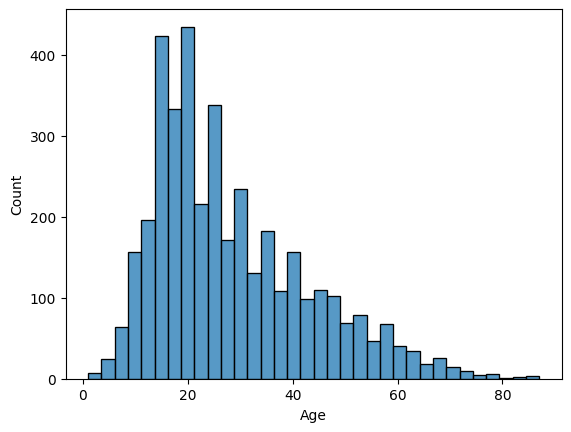

In [45]:
# Q2.5
dfShark_cleaned["Age"].unique() # weird ass values like ! Both 11, Middle age, a minor, 'MAKE LINE GREEN'. I'm just gonna drop those cause what
dfShark_cleaned["Age"] = pd.to_numeric(dfShark_cleaned["Age"], errors='coerce')
dfShark_cleaned["Age"] = dfShark_cleaned["Age"].replace(0, np.nan)
dfShark_cleaned.dropna(subset=["Age"], inplace=True)
dfShark_cleaned["Age"].unique()
sns.histplot(data=dfShark_cleaned, x="Age")

In [55]:
# Q2.6
dfShark_cleaned["Type"].unique()
allowed = ['Unprovoked', 'Provoked', 'unprovoked', 'Unknown']
dfShark_cleaned["Type"] = dfShark_cleaned["Type"].where(dfShark_cleaned["Type"].isin(allowed))
dfShark_cleaned.dropna(subset=["Type"], inplace=True)
dfShark_cleaned["Type"] = dfShark_cleaned["Type"].replace('unprovoked', 'Unprovoked')
dfShark_cleaned["Type"].value_counts()
# Unprovoked    3258
# Provoked       308
3258/(3258+308)
# Proportion Unprovoked: 0.9136287156477846

0.9136287156477846

In [64]:
# Q2.7
dfShark_cleaned.columns
dfShark_cleaned['Fatal Y/N'].unique()
dfShark_cleaned["Fatal Y/N"] = dfShark_cleaned["Fatal Y/N"].astype(str).str.strip()
allowedFatal = ['Y', 'N', 'UNKNOWN']
dfShark_cleaned["Fatal Y/N"] = dfShark_cleaned["Fatal Y/N"].where(dfShark_cleaned["Fatal Y/N"].isin(allowedFatal))
dfShark_cleaned.dropna(subset=["Fatal Y/N"], inplace=True)
dfShark_cleaned['Fatal Y/N'].unique()
dfShark_cleaned['Fatal Y/N'].value_counts()

Fatal Y/N
N          2900
Y           644
UNKNOWN      10
Name: count, dtype: int64

In [63]:
# Q2.8
dfShark_cleaned["Fatal Y/N"].value_counts()
# Based on columns Type and Fatal Y/N, we can see that most unprovoked shark attacks are non-fatal.
# So there seems to be a correlation between the two variables.

Fatal Y/N
N          2900
Y           644
UNKNOWN      10
Name: count, dtype: int64

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

My Answers:

Q3.1: This paper talks about how there is a specific part of data cleaning called data tidying that makes it easier to create tools to analyze data. This focuses on isolating rows as observations and each column as variables that can be manipulated.

Q3.2: The "tidy data standard" is intended to "designed to facilitate initial exploration and analysis of the data, and to simplify the development of data analysis tools that work together". Also known as help make the data easier to work with in a easy structure so it's easier to analyze with specific tools

Q3.3: It's saying it's easy to guess what are observations and variables are in a dataset, but system of making them uniform is harder. Depending on the context, you might be looking for different things/factors in variables and that can change how you view what is needed/wanted to be an observation.

Q3.4: Values are either numbers or strings that are collected in a dataset, variables contains all values that measure the same underlying attribute across units, and observations contain all values measures on the same unit across attributes.

Q3.5: "Tiday Data" is defined as a standard way of mapping the meaning of a dataset to its structure. It is composed of making sure each variables forms a column, each observation forms a row, and each type of observational unit forms a table.

Q3.6: 5 most common problems with messy datasets include:
        1. Column headers are values, not variable names.
        2. Multiple variables are stored in one column.
        3. Variables are stored in both rows and columns.
        4. Multiple types of observational units are stored in the same table.
        5. A single observational unit is stored in multiple tables.
      Table 4 is messy because the columns and rows need to be switched. We want to focus on religion as variables we're measuring and income should be our observations so it's easier to separate by these attributes of what we want to focus on.
      "Melting" is also known as stacking it where we need to turn columns into rows. 

Q3.7: Table 11 is messy because there's so many blank values for each variable that it doesn't really make it easy to get any analysis out of it while table 12 is "molten" because instead of values, the element column contain neames of variables.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
6. Which giftors provide the most money, in total? 

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64

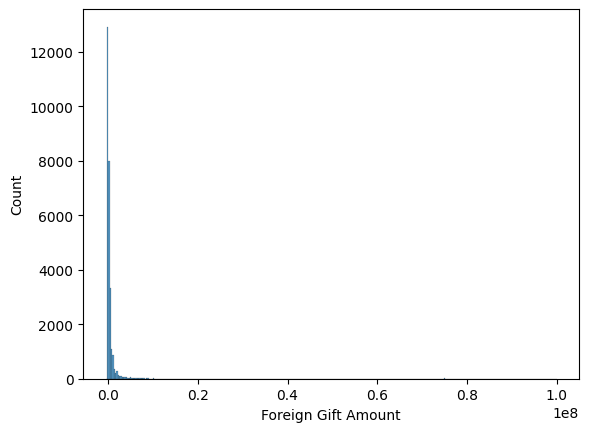

In [68]:
# Q4.1
dfGifts = pd.read_csv('data/ForeignGifts_edu.csv', encoding='latin1')

# Q4.2
sns.histplot(data=dfGifts, x="Foreign Gift Amount")
# Based on the histogram, the distribution of foreign gift amounts appears to be right-skewed, with a long tail extending towards higher values. 
# This suggests that while most foreign gifts are of lower amounts, there are a few instances of significantly higher gift amounts.
dfGifts["Foreign Gift Amount"].describe()

Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64

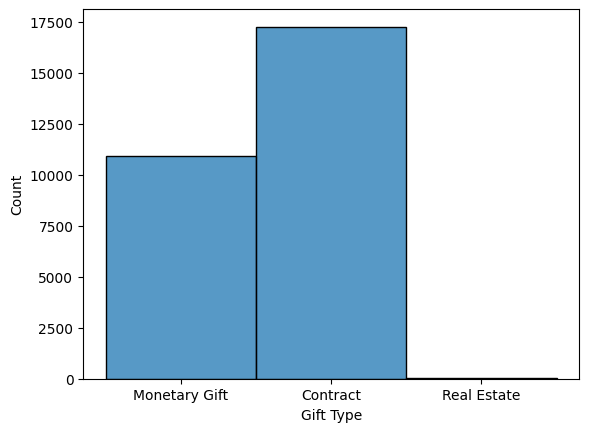

In [72]:
# Q4.3
sns.histplot(data=dfGifts, x="Gift Type")
dfGifts['Gift Type'].value_counts(normalize=True)

In [87]:
# Q4.4
# Top 15 Countries by Number of gifts:
dfGifts.columns
# Top 15 Countries by total amount given
dfGifts.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64

In [88]:
# Q4.4
# Top 15 Countries by number of gifts
dfGifts.groupby('Country of Giftor')['Foreign Gift Amount'].count().sort_values(ascending=False).head(15)

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: Foreign Gift Amount, dtype: int64

In [101]:
# Q4.5
# Top 15 Institutions in terms of total amount of money receive
dfGifts.columns
dfGifts["Gift Type"].unique()
dfGifts[dfGifts["Gift Type"] == 'Monetary Gift'].groupby('Institution Name')["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15)

Institution Name
Harvard University                             627333843
Massachusetts Institute of Technology          564038939
Yale University                                413388173
Johns Hopkins University                       412689952
Stanford University                            311516425
Duke University                                300700996
Brigham Young University                       264362953
University of Pennsylvania                     200298061
Columbia University in the City of New York    188031573
Cornell University                             162751027
New York University                            159598551
University of Chicago (The)                    146204415
University of California, Berkeley             124905001
Princeton University                           103837135
University of Southern California              101307579
Name: Foreign Gift Amount, dtype: int64

<Axes: xlabel='Foreign Gift Amount', ylabel='Count'>

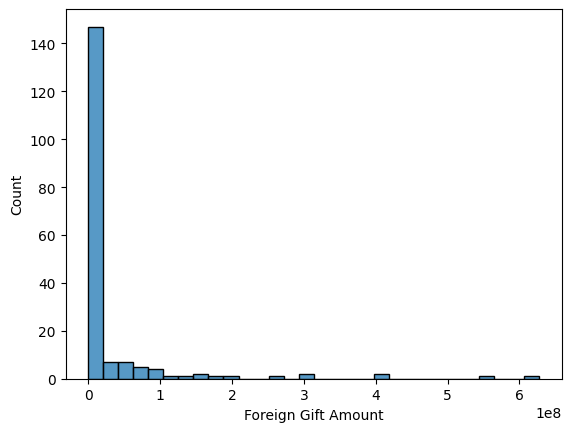

In [104]:
# 4.5 Histogram of Foreign Gift Amount for Monetary Gifts
institution_totals = (
    dfGifts[dfGifts["Gift Type"] == 'Monetary Gift'].groupby("Institution Name")["Foreign Gift Amount"].sum())
sns.histplot(institution_totals, bins=30)

In [107]:
# 4.6
dfGifts.columns
dfGifts[dfGifts["Gift Type"] == "Monetary Gift"].groupby("Giftor Name")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15)
# In terms of money, it would be anonymous people and the Church of Jesus Christ of LDS that have the biggest contributions.

Giftor Name
Anonymous                              269469611
Church of Jesus Christ of LDS          185203715
Anonymous #9                            96334996
Sanofi-Aventis Recherche                58520202
Skolkovo Foundation                     51500000
Qatar Foundation                        50485963
Stavros S. Niarchos Foundation          48234560
Sanofi-Aventis Recerche                 45410193
Donor                                   44155215
Mr. Mohammed A. Jameel                  43000000
Tianqiao Chen                           40000000
Shanda Global Investment Limited        35000000
Tata Education and Development Trus     35000000
Saudi Arabian Cultural Mission          34385034
Anonymous #3                            32074679
Name: Foreign Gift Amount, dtype: int64

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [118]:
# Q5.1
dfCollege = pd.read_csv('data/college_completion.csv', encoding='latin1')

# Q5.2
# Observations
print("Number of observations:", dfCollege.shape[0])

Number of observations: 3798


In [119]:
# Q5.2 Variables
dfCollege.columns

Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6_first',
  

In [121]:
# Q5.2 Examination part
dfCollege.head()

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [122]:
# Q5.3

pd.crosstab(dfCollege['control'], dfCollege['level'])

# My describtion: It seems that the majority of public institutions are at the 2-year college level, private non-profit institutions are more at the 4-year college level, and private for-profit institutions have more at the 4-year college level.
# Private non-for-profit institutions have a higher proportion of 4-year colleges compared to public and private for-profit institutions.
# Public has roughly 2/3rds 2-year colleges, while private non-profit is slightly more evenly split between 2-year and 4-year colleges.

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


<Axes: xlabel='grad_100_value', ylabel='Density'>

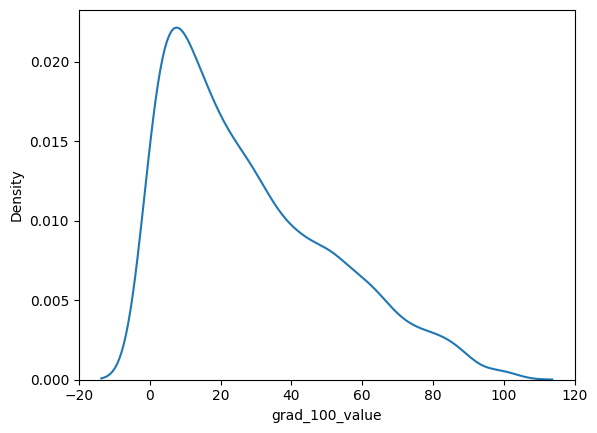

In [124]:
# Q5.4
sns.kdeplot(data=dfCollege, x="grad_100_value")
# It seems that the grad_100 has a right-skewed distribution, with most colleges having graduation rates below 60%, and a smaller number of colleges achieving higher graduation rates closer to 100%.
# Most seem to cluster around the 10-20% range.

<Axes: xlabel='grad_100_value', ylabel='Density'>

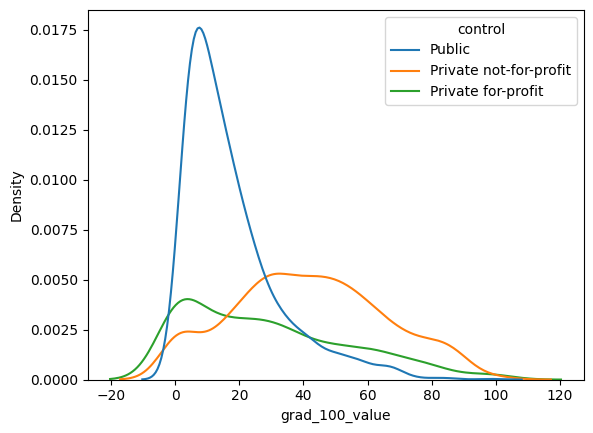

In [125]:
# Q5.4 Now condition for control
sns.kdeplot(data=dfCollege, x="grad_100_value", hue="control")

# Public instiutions tend to have lower graduation rates compared to private non-profit institutions, which show a wider distribution of graduation rates, including higher values. 
# Private for-profit institutions generally have lower graduation rates, with a significant concentration around the lower end of thhe grad_100_value.
# In terms of most favorable graduation rates: Private not-for-profit seems to be better.

Covariance of aid_value and grad_100_value: 88610.48316902434
Correlation of aid_value and grad_100_value: 0.5758792845936073


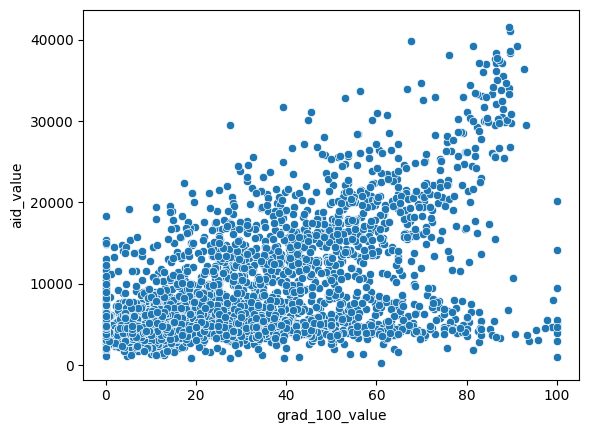

In [131]:
# Q5.5
sns.scatterplot(data=dfCollege, x="grad_100_value", y="aid_value")
covariance2 = dfCollege["aid_value"].cov(dfCollege["grad_100_value"])
correlation2 = dfCollege["aid_value"].corr(dfCollege["grad_100_value"])
print("Covariance of aid_value and grad_100_value:", covariance2)
print("Correlation of aid_value and grad_100_value:", correlation2)

# Description: There appears to be a positive correlation between aid_value and grad_100_value, suggesting that colleges that provide more financial aid tend to have higher graduation rates. 
# The covariance value indicates the direction of the relationship, while the correlation coefficient quantifies the strength of this relationship. A higher correlation coefficient would suggest a stronger association between the two variables.
# I see there is a high covariance and moderate positive correlation between aid_value and grad_100_value. The graph shows it's really scattered but there is a slight upward trend.

Covariance of aid_value and grad_100_value with control:                                           aid_value  grad_100_value
control                                                            
Private for-profit     aid_value       1.957540e+06     6897.524957
                       grad_100_value  6.897525e+03      655.446387
Private not-for-profit aid_value       6.041488e+07   109274.123337
                       grad_100_value  1.092741e+05      554.660462
Public                 aid_value       4.564360e+06    15355.146212
                       grad_100_value  1.535515e+04      216.956489
Correlation of aid_value and grad_100_value with control:                                        aid_value  grad_100_value
control                                                         
Private for-profit     aid_value        1.000000        0.188363
                       grad_100_value   0.188363        1.000000
Private not-for-profit aid_value        1.000000        0.601591
                

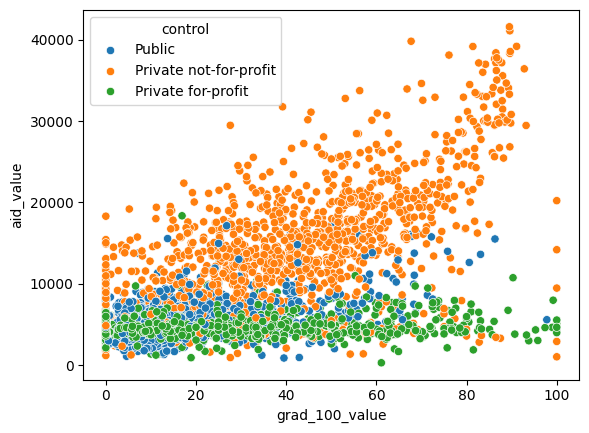

In [133]:
# Q5.5 with control
sns.scatterplot(data=dfCollege, x="grad_100_value", y="aid_value", hue="control")
covariance3 = dfCollege.groupby("control")[["aid_value", "grad_100_value"]].cov()
correlation3 = dfCollege.groupby("control")[["aid_value", "grad_100_value"]].corr()

print("Covariance of aid_value and grad_100_value with control:", covariance3)
print("Correlation of aid_value and grad_100_value with control:", correlation3)
# The relationship between aid_value and grad_100_value appears to vary by control type. There seems to be a moderate positive correlation between aid value and graduation rates, especially for public and private not-for-profit institutions.
# Public institutions show a moderate positive correlation based on the correlation value, indicating that higher financial aid is associated with higher graduation rates.
# Private not-for-profit institutions exhibit a stronger positive correlation, suggesting that financial aid plays a significant role in graduation rates for these colleges.
# Private for-profit institutions show a weaker correlation.

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

# Answer: Attached in the forked github

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64

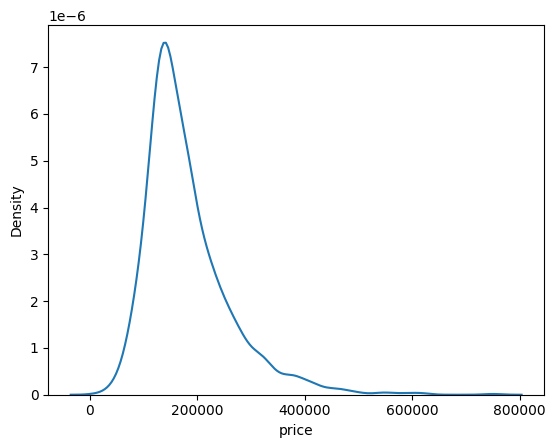

In [143]:
# Q7.1
dfAMES = pd.read_csv('data/ames_prices.csv', encoding='latin1')
dfCollege = pd.read_csv('data/college_completion.csv', encoding='latin1')

# Q7.2
dfAMES.columns
sns.kdeplot(data=dfAMES, x='price')
dfAMES['price'].describe()


,count,mean,std,min,25%,50%,75%,max
Bldg.Type,,,,,,,,
1Fam,2425.0,184812.041237,82821.802329,12789.0,130000.0,165000.0,220000.0,755000.0
2fmCon,62.0,125581.709677,31089.239840,55000.0,106562.5,122250.0,140000.0,228950.0
Duplex,109.0,139808.935780,39498.973534,61500.0,118858.0,136905.0,153337.0,269500.0
Twnhs,101.0,135934.059406,41938.931130,73000.0,100500.0,130000.0,170000.0,280750.0
TwnhsE,233.0,192311.914163,66191.738021,71000.0,145000.0,180000.0,222000.0,392500.0


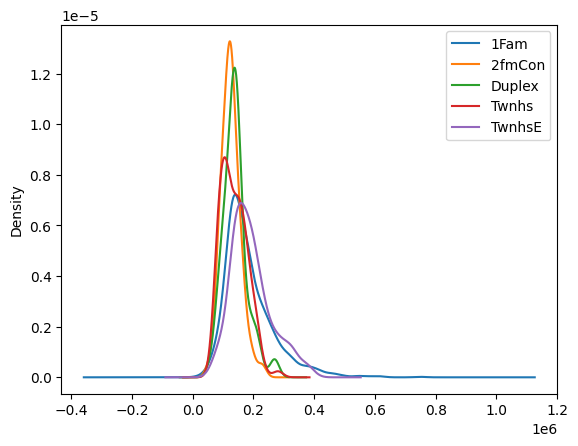

In [149]:
# Q7.2 KDE with groupby()
dfAMES.groupby('Bldg.Type')['price'].plot(kind='kde', legend=True)
dfAMES.groupby('Bldg.Type')['price'].describe()

# On average, 1Fam (one family) and TwnhsE (town house) are the most expensive.
# The highest variance in transation price is 1Fam (1 family) building types.


In [154]:
# Q7.2 Variance
dfAMES.groupby('Bldg.Type')['price'].var()

Bldg.Type
1Fam      6.859451e+09
2fmCon    9.665408e+08
Duplex    1.560169e+09
Twnhs     1.758874e+09
TwnhsE    4.381346e+09
Name: price, dtype: float64

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64

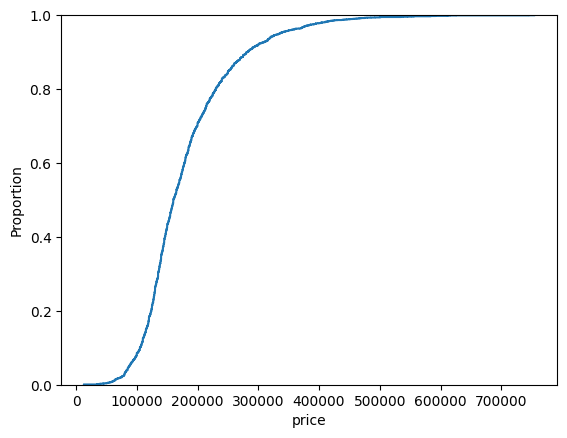

In [161]:
# Q7.3
sns.ecdfplot(data=dfAMES,x="price")
dfAMES["price"].describe()

<Axes: xlabel='price'>

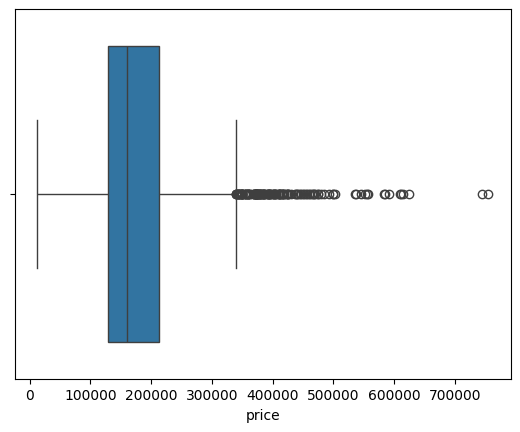

In [163]:
# Q7.4
sns.boxplot(data=dfAMES, x="price")

# There's a lot of outlier


<Axes: xlabel='price'>

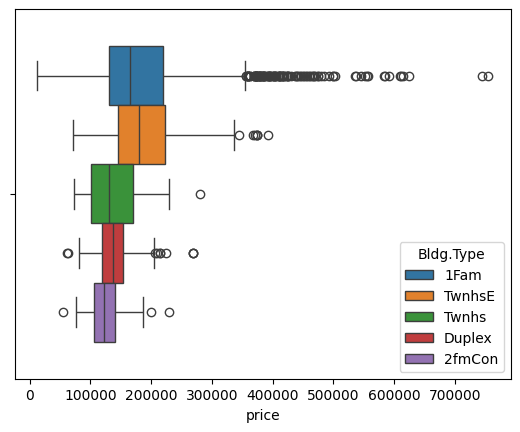

In [ ]:
# Q7.4 conditional
sns.boxplot(data=dfAMES, x="price", hue="Bldg.Type")

# In terms of pattern, I see most of them are centered between 100000-150000. At least their medians and 1st and 3rd quartiles are.
# All of them have outliers, but 1Fam seems to have the most outliers

In [166]:
# Q7.5
Q1 = dfAMES["price"].quantile(0.25)
Q3 = dfAMES["price"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

dfAMES["outlier"] = ((dfAMES["price"] < lower) | (dfAMES["price"] > upper)).astype(int)

/usr/local/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:4786: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:4786: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


count      2930.000000
mean     177632.528669
std       66195.453960
min       87500.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      335000.000000
Name: winsorizedPrice, dtype: float64

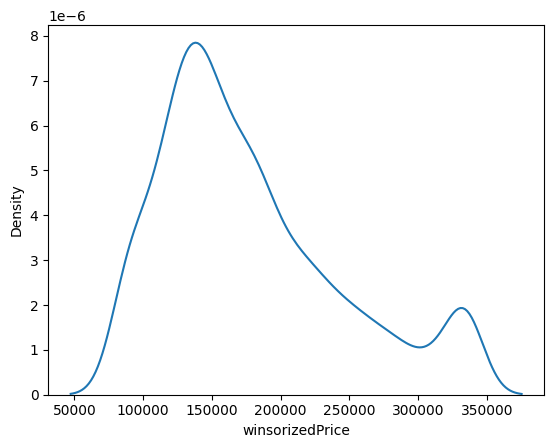

In [ ]:
# Q7.6
from scipy.stats.mstats import winsorize
dfAMES['winsorizedPrice'] = winsorize(dfAMES['price'], limits=[0.05, 0.05])
# ngl I chatted the limits cause I didn't know what to set them but essentially the limits restrict the outputs so that it knows what outliers
# to take out so I can winsorize this poop. 
dfAMES['winsorizedPrice'].describe()
sns.kdeplot(data=dfAMES, x='winsorizedPrice') 
dfAMES['winsorizedPrice'].describe()

# The change was pretty drastic. The mean and max went down for the describe table. For the new kernel density plot the center is larger.
# The spread is also larger and it even has a more prominent but small peak on the right side of the graph compared to the original.